# **The Sparks Foundation Data Science and Business Analytics Internship**

Task2: From the given 'iris' dataset predict optimum number of clusters and represent it visually

Author: Sreehari M P

In this execise we will be using the python code to predict the optimum number of clustering groups from the given iris data set as input using the unsupervised machine learning kMeans algorithm .
Unsupervised learning mean we dont know about the relation between datas. We have to find the relation betwen data and find an optimum number of cluster. 

# **Step 1:Import all Necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 2:Load Data**

Data is taken from the sklearn library. Then i will be loading the data to jupyter notebook and I will analyse the data to understand it better and to filter unwanted informations.

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


# **Step 3:Analyse Data**

In [29]:
df.shape

(150, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   flower_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [31]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Correlation is a statistical measure that indicates the degree to which two or more variables are related to each other

In [32]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

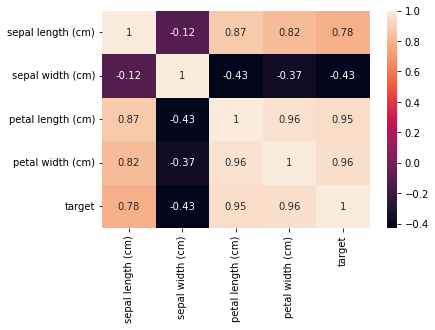

In [33]:
sns.heatmap(df.corr(),annot=True)

# **Step 4:Data Visualization**

Here we use pairplot to visually analyse the data.

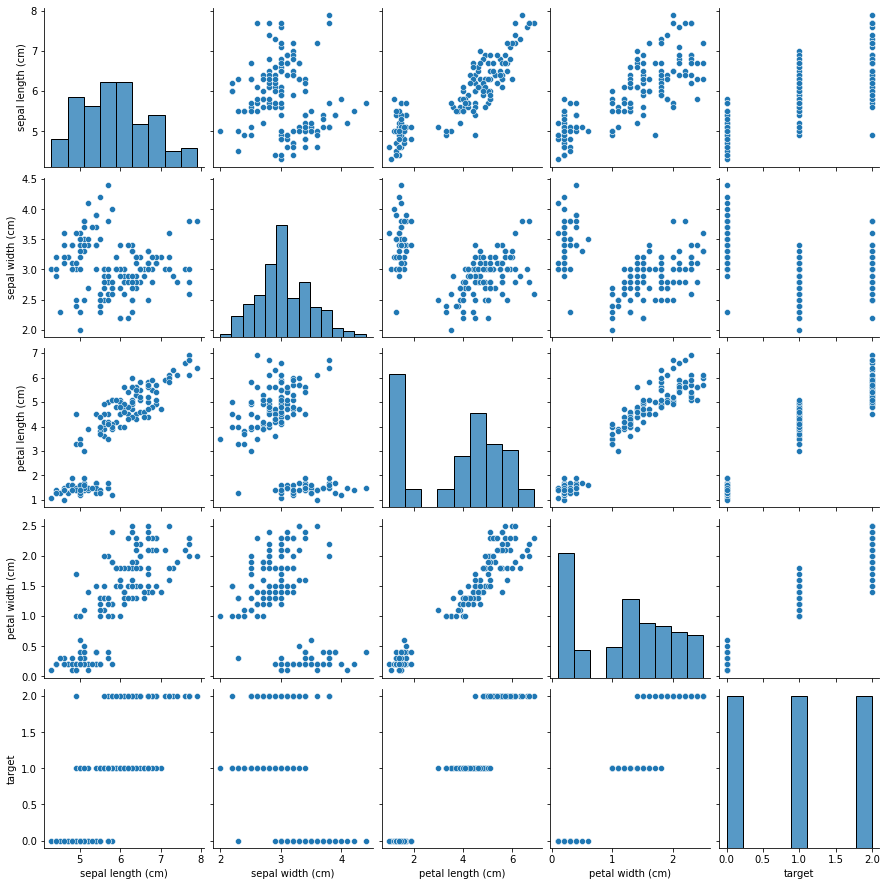

In [34]:
sns.pairplot(df)

# **Step 5 : Clustering**

We use Kmeans clustering to do the clustering. Then we use Elbow method to find the optimum number of clusters.

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [39]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [41]:
# create empty list to store sea values for each k
sea = []

# fit KMeans algorithm for k values between 1 and 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    sea.append(kmeans.inertia_)


C:\sreehari\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


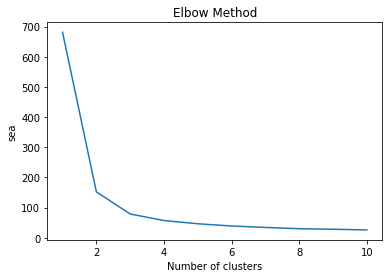

In [42]:
# plot the elbow curve
plt.plot(range(1, 11), sea)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sea')
plt.show()

From this we choose optimum cluster number as 3.For k=3 we will analyse how well custering fits

In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
df['clusters']=y_predicted
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,clusters
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2
146,6.3,2.5,5.0,1.9,2,virginica,0
147,6.5,3.0,5.2,2.0,2,virginica,2
148,6.2,3.4,5.4,2.3,2,virginica,2


# **Step 6 : Visualizing Clusters**

In [46]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]

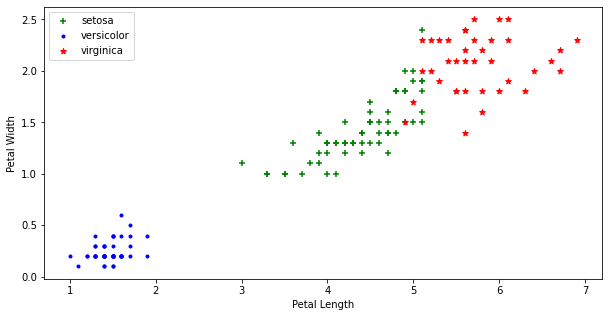

In [56]:
plt.figure(figsize=(10,5))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.',label='versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='*',label='virginica')
plt.legend()
plt.show()

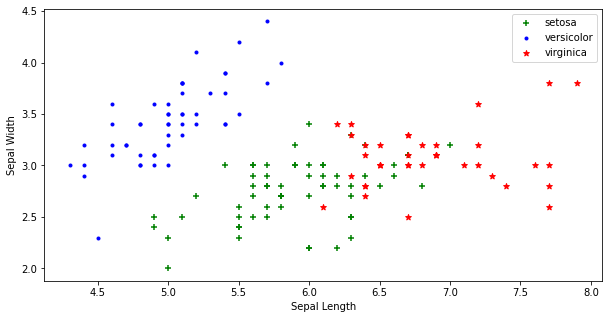

In [58]:
plt.figure(figsize=(10,5))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.',label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*',label='virginica')
plt.legend()
plt.show()

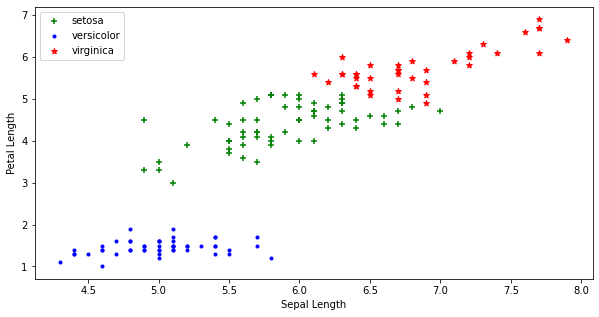

In [61]:
plt.figure(figsize=(10,5))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'],color="blue",marker='.',label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'],color="red",marker='*',label='virginica')
plt.legend()
plt.show()

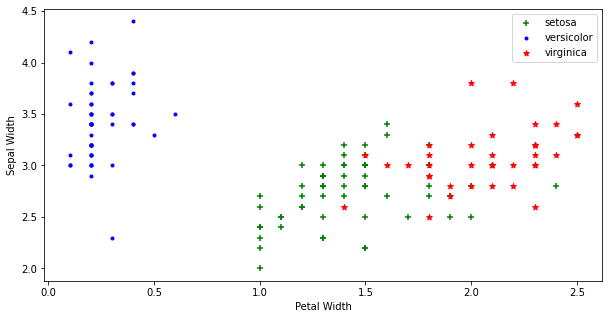

In [63]:
plt.figure(figsize=(10,5))
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal width (cm)'], df0['sepal width (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['petal width (cm)'], df1['sepal width (cm)'],color="blue",marker='.',label='versicolor')
plt.scatter(df2['petal width (cm)'], df2['sepal width (cm)'],color="red",marker='*',label='virginica')
plt.legend()
plt.show()